# Лабараторная работа №6
## Линейная регрессия в Sklearn
**Выполнил:** 6131-010402D, Музыка Артем

### 0. Найти и загрузить датасет, подходящий для задачи регрессии.
Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data\deaths.csv')

1.   AnalysisDate                                                                                       `object`
2.  Date Of Death Year                                                                                  `int64` 
3.   Date Of Death Month                                                                                `int64` 
4.   Start Date                                                                                         `object`
5.   End Date                                                                                           `object`
6.   Jurisdiction of Occurrence                                                                         `object`
7.   Sex                                                                                                `object`
8.   Race/Ethnicity                                                                                     `object`
9.   AgeGroup                                                                                           `object`
10.  AllCause                                                                                           `int64 `
11.  NaturalCause                                                                                       `int64 `
12.  Septicemia (A40-A41)                                                                               `int64 `
13.  Malignant neoplasms (C00-C97)                                                                      `int64 `
14.  Diabetes mellitus (E10-E14)                                                                        `int64 `
15.  Alzheimer disease (G30)                                                                            `int64 `
16.  Influenza and pneumonia (J09-J18)                                                                  `int64 `
17.  Chronic lower respiratory diseases (J40-J47)                                                       `int64 `
18.  Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)                                 `int64 `
19.  Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)                              `int64 `
20.  Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  `int64 `
21.  Diseases of heart (I00-I09,I11,I13,I20-I51)                                                        `int64 `
22.  Cerebrovascular diseases (I60-I69)                                                                 `int64 `
23.  COVID-19 (U071, Multiple Cause of Death)                                                           `int64 `
24.  COVID-19 (U071, Underlying Cause of Death)                                                         `int64 `

### Обработка датасета

In [6]:
L_del = ['AnalysisDate', 'Start Date', 'End Date']
try:
    for i in L_del:
        df.pop(i)
except:
    pass

In [7]:
def sex_replce(S):
    if S == 'Female':
        S = S.replace('emale','')
    if S == "Male":
        S = S.replace('ale','')
    return S

In [8]:
df['Sex'] = df['Sex'].apply(sex_replce)

In [9]:
L_object = ['Jurisdiction of Occurrence','Sex','Race/Ethnicity','AgeGroup']
for i in L_object:
    code, unique = pd.factorize(df[i])
    df[i] = code

In [10]:
Y = df['Sex']
df.pop('Sex')
X = df

### 1. Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [12]:
full_copy = np.array(df, copy=True)

In [15]:
for_delete = ['Jurisdiction of Occurrence', 'Race/Ethnicity', 'AgeGroup']

In [16]:
for f in for_delete:
    df.pop(f)

### 2. Визуализировать heatmap-матрицу кореллированности признаков

<AxesSubplot:>

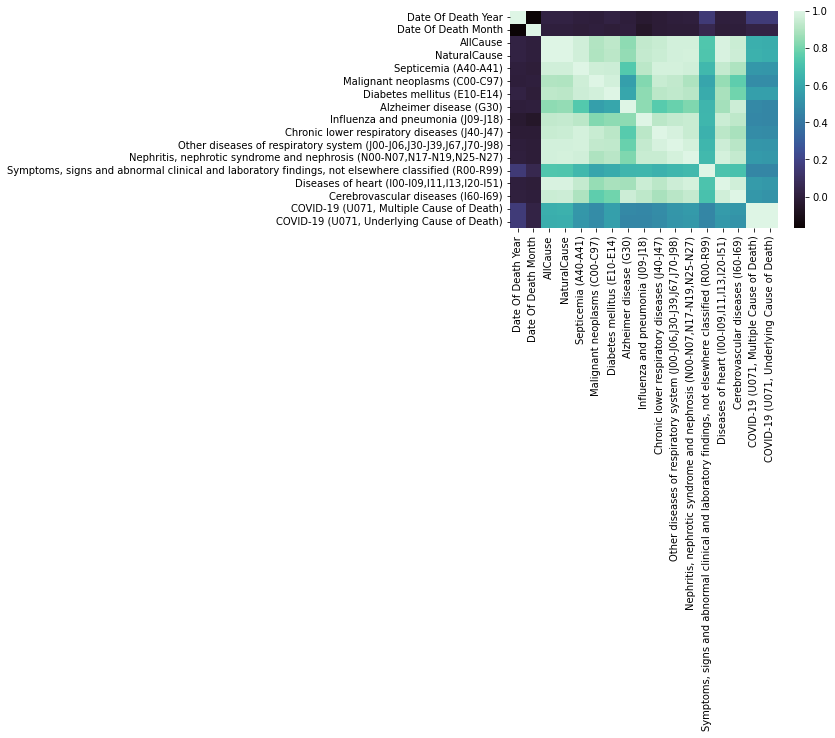

In [19]:
sns.heatmap(df.corr(), cmap="mako")

### 3. Визуализировать взаимосвязь между целевой переменной и каждым признаком (с помощью `srs.pairplot` или `pandas.plotting`.`scatter_matrix` или как-то ещё). 
Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной.


In [20]:
sns.pairplot(data=df, 
             x_vars = df.drop("charges", axis=1).columns, 
             y_vars=["charges"], 
             height=7)

KeyError: "['charges'] not found in axis"

### 4. Разделить набор данных на обучающую и тестовую выборки

### 5. Линейная регрессия
#### 5.1 Обучить модель линейной регрессии (`LinearRegression`)

#### 5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

#### 5.3 Вывести `model.coef_` и `model.intercept_`

#### 5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же, как мы строили графики для feature_importance в теме с деревьями). Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси. 

### 6. Модель `Lasso`

#### 6.1 Обучить модель регрессии (`Lasso`), с помощью `GridSearchCV` подобрать параметр alpha, дальше работаем с лучшей моделью

#### 6.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

#### 6.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

#### 6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

### 7. Модель `Ridge`
#### 7.1 Обучить модель регрессии (`Ridge`), с помощью `GridSearchCV`  подобрать параметр alpha, дальше работаем с лучшей моделью

#### 7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

#### 7.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

#### 7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

### 8. Модель `ElasticNet`
#### 8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

#### 8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

#### 8.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

#### 8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

### 9. Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

### 10. Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через `pd.get_dummies( ..., drop_first = True )`. Обучаем лучшую модель.

### 11. Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

### 12. Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. 
Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы. 

### 13. Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12